<a href="https://colab.research.google.com/github/akyvibes/workshopsAI/blob/main/Eworkshop5Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


# New section

In [5]:
data = pd.read_csv("diabetes_.csv")
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
print(data.info())
print(data.describe())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [7]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in cols:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].mean(), inplace=True)

print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-2298737255.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [8]:
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values


In [9]:
def train_test_split_scratch(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    split = int(len(X) * test_size)
    return X[idx[split:]], X[idx[:split]], y[idx[split:]], y[idx[:split]]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)


In [10]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict_single(query, X_train, y_train, k):
    distances = [euclidean_distance(query, x) for x in X_train]
    k_idx = np.argsort(distances)[:k]
    return np.bincount(y_train[k_idx]).argmax()

def knn_predict(X_test, X_train, y_train, k):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100


In [11]:
pred = knn_predict(X_test, X_train, y_train, k=5)
print("Accuracy (Unscaled):", accuracy(y_test, pred))


Accuracy (Unscaled): 67.3913043478261


In [12]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = min_max_scale(X)
Xs_train, Xs_test, ys_train, ys_test = train_test_split_scratch(X_scaled, y)


In [13]:
pred_s = knn_predict(Xs_test, Xs_train, ys_train, k=5)
print("Accuracy (Scaled):", accuracy(ys_test, pred_s))


Accuracy (Scaled): 71.30434782608695


In [14]:
k_vals = range(1,16)
acc_o, acc_s, t_o, t_s = [], [], [], []

for k in k_vals:
    st = time.time()
    acc_o.append(accuracy(y_test, knn_predict(X_test, X_train, y_train, k)))
    t_o.append(time.time() - st)

    st = time.time()
    acc_s.append(accuracy(ys_test, knn_predict(Xs_test, Xs_train, ys_train, k)))
    t_s.append(time.time() - st)


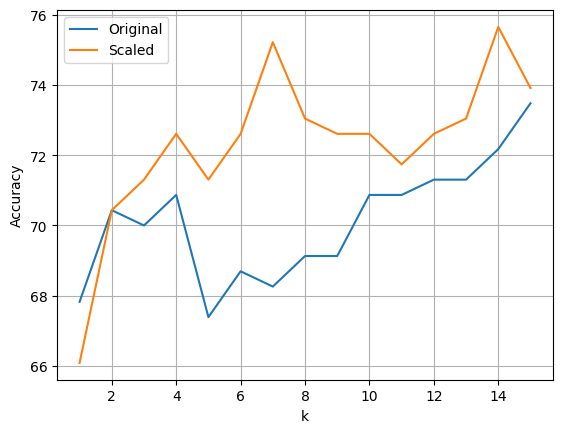

In [15]:
plt.plot(k_vals, acc_o, label="Original")
plt.plot(k_vals, acc_s, label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


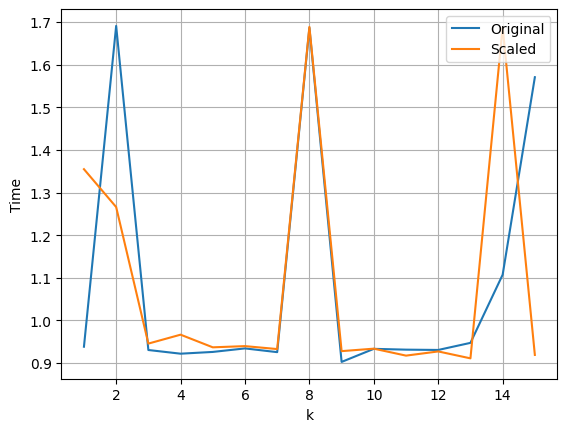

In [16]:
plt.plot(k_vals, t_o, label="Original")
plt.plot(k_vals, t_s, label="Scaled")
plt.xlabel("k")
plt.ylabel("Time")
plt.legend()
plt.grid()
plt.show()
